# MOVIE GENRE CLASSIFICATION

#####
We need to create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machines.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

### Load data
Our data is in txt file format so we need to change it. here we load the training data from the 'train_data.txt' file using pandas. We specify the custom separator ::: to correctly parse the data. The train DataFrame is created with columns "ID", "Title", "Genre", and "Description"

In [2]:
train_dataset_path = 'train_data.txt'
train_column_names = ['ID', 'Title', 'Genre', 'Description']
train = pd.read_csv(train_dataset_path, sep=':::', engine='python', names=train_column_names)
train.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test_dataset_path = 'test_data.txt'
test_column_names = ['ID', 'Title', 'Description']
test = pd.read_csv(test_dataset_path, sep=':::', engine='python', names=test_column_names)
test.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
train.shape

(54214, 4)

In [5]:
test.shape

(54200, 3)

### To check if we have any NAN values

In [6]:
train.columns[train.isna().any()]

Index([], dtype='object')

In [7]:
test.columns[test.isna().any()]

Index([], dtype='object')

### Histogram for Description Length:
Using histogram to visualize the distribution of movie description lengths in dataset.
This will help us to understand the typical length of descriptions in dataset.

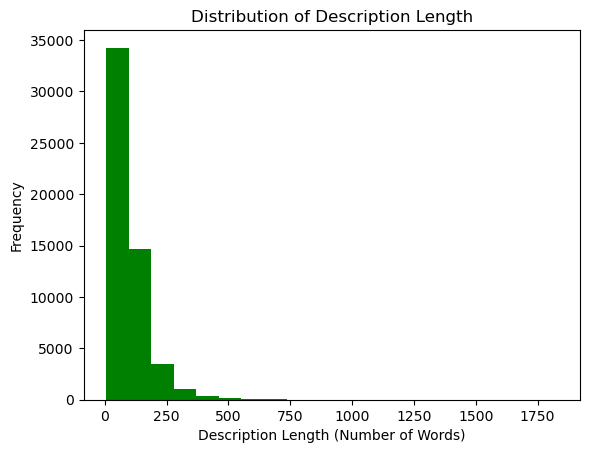

In [8]:
description_lengths = train['Description'].str.split().apply(len)  # Calculate the length of descriptions.
plt.hist(description_lengths, bins=20, color='green')
plt.xlabel('Description Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Description Length')
plt.show()

### 
We are going to train our data using train file and test data using test file
Our train file contains "ID", "Title", "Genre", and "Description" columns and test data file contains "ID", "Title", and "Description" columns 

### We want our model to predict genre of movie using Description

### Preprocesing the training data 
we are using TF-IDF vectorization to convert text data into numerical features and then train a Multinomial Naive Bayes classifier. 

In [9]:
# Using (TF-IDF vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(train['Description'])

### Training a Model Using Multinomial Naive Bayes Classifier

In [10]:
# Train the model (Multinomial Naive Bayes)
clf = MultinomialNB()
clf.fit(X_train, train['Genre'])

MultinomialNB()

### Preprocesing the testing data 

In [11]:
X_test = tfidf_vectorizer.transform(test['Description'])

### Predict Genre using test data 

In [12]:
test_predictions = clf.predict(X_test)

In [13]:
# Add predictions to the test DataFrame
test['Predicted_Genre'] = test_predictions

### Save the test DataFrame with predictions to a CSV file

In [14]:
test.to_csv('test_predictions.csv', index=False)

In [15]:
test.head()

,ID,Title,Description,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama


### Bar Chart for Predicted Genres:
Creating a bar chart to visualize the distribution of predicted movie genres in test dataset.
This chart allows us to see how many movies are predicted to belong to each genre.

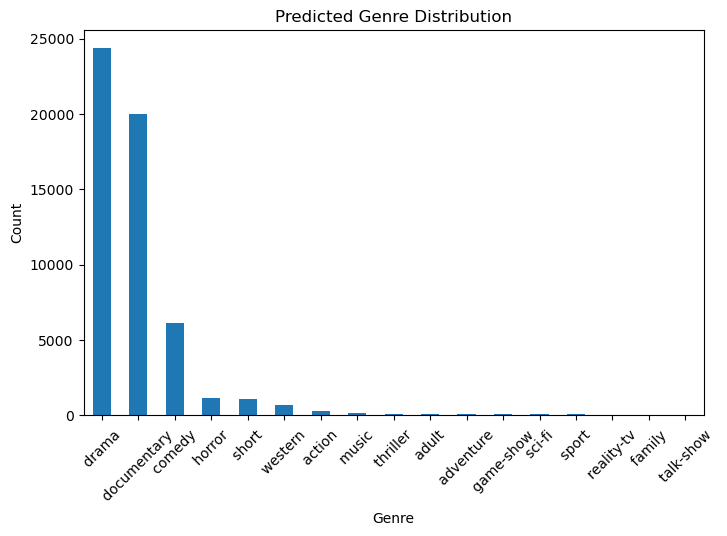

In [16]:
# Counting the predicted genres
genre_counts = test['Predicted_Genre'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
genre_counts.plot(kind='bar')
plt.title('Predicted Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()